<a href="https://colab.research.google.com/github/umarzaib1/Exploratory-Data-Analysis-of-Retail-Data/blob/main/online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data
Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.

In [ ]:
import pandas as pd

data = pd.read_excel('Online Retail.xlsx')
#data.head()

## Task 2: Data Cleaning
Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.

## Droping Rows with null values

In [ ]:
data.info() # Check data info before cleaning
data.shape # check data shape before cleaning

In [ ]:
# Look for Na values
data.isnull().sum()
# Droping all rows where Description and CustomerID has NA values
data = data.dropna(subset=['Description', 'CustomerID']).reset_index(drop= True)

In [ ]:
data.isnull().sum() # Recheck to see any Na values
data.info()  # Check the data info
data.shape  # check data shape after droping Na values

## Filling Na Values incase one wants to keep them
We have to fill the missing values to include them in the rest of the data to avoid problem of less number of instances. **while using this approach you have to avoid running the above two cells.**

In [ ]:
# filling the missing values in Description Columns with "Missing" String
data['Description'].fillna("Missing", inplace= True)
data.isnull().sum()

/tmp/ipython-input-4248655941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Description'].fillna("Missing", inplace= True)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
data.fillna({'CustomerID':"Missing Description"}, inplace = True)
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


## Handling Duplicated values
Looking for any duplicated rows to drop them

In [ ]:
data

In [ ]:
data.duplicated().sum() # cheack number of duplicates

duplicated = data[data.duplicated()] # Get all the duplicated rows
data.drop_duplicates(duplicated, inplace=True) # drop the duplicated rows

data.shape

(401604, 8)

## Task 3: Basic Data Statistics
Explore the basic statistics of the dataset, including measures of central tendency and dispersion.

In [ ]:
description = data.describe()
max_price = data['UnitPrice'].max()
min_price = data['UnitPrice'].min()
avg_price = data['UnitPrice'].mean().round(2)

## Task 4: Data Visualizations with Matplotlib and Seaborn
Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.

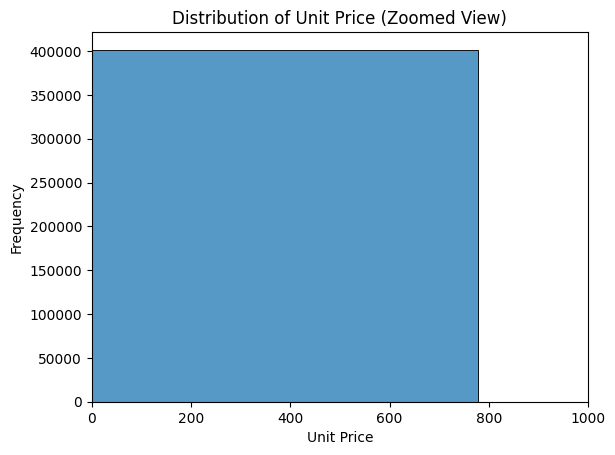

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame after cleaning
# If you used a different variable name, replace 'data' with it

# Create the histogram using seaborn
sns.histplot(data=data, x='UnitPrice', bins=50)

# Set the x-axis limits to focus on the lower range
# Adjust the upper limit (e.g., 100) based on what you saw in the full histogram
plt.xlim(0, 1000)

# Add title and labels for clarity
plt.title("Distribution of Unit Price (Zoomed View)")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")

# Show the plot
plt.show()

## Task 5: Analyze trends
Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.


In [ ]:
# Convert 'InvoiceDate' column to datetime objects
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculate the total price for each transaction line item
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Display the first few rows with the new column
display(data.head())

# Display the data types to confirm the change
print(data.info())

In [ ]:
# Extract month and day of the week from InvoiceDate
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()

# Analyze sales trends by month
monthly_sales = data.groupby('YearMonth')['TotalPrice'].sum().sort_index()
print("Monthly Sales Trends:")
display(monthly_sales)

# Analyze sales trends by day of the week
# Ensure the days are in order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['DayOfWeek'] = pd.Categorical(data['DayOfWeek'], categories=days_order, ordered=True)
daily_sales = data.groupby('DayOfWeek')['TotalPrice'].sum()
print("\nDaily Sales Trends:")
display(daily_sales)

## Task 6: Explore top selling product and countries
Explore the top-selling products and countries based on the quantity sold.

In [ ]:
# Analyze top selling products
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Selling Products:")
display(top_products)

# Analyze top selling countries
top_countries = data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Selling Countries:")
display(top_countries)

## Task 7: Identify Outliers and Anomalies
Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

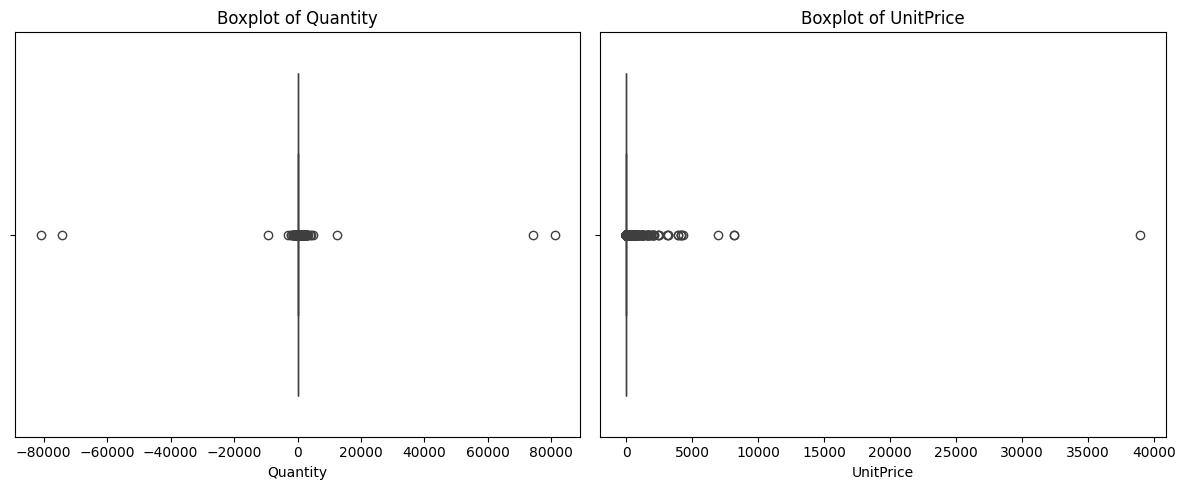

In [ ]:
# Identify outliers in Quantity and UnitPrice
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['Quantity'])
plt.title('Boxplot of Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['UnitPrice'])
plt.title('Boxplot of UnitPrice')

plt.tight_layout()
plt.show()

## Task 8: Draw Conclusions and Summarize Findings
Draw conclusions and summarize your findings from the exploratory data analysis.

Based on the analysis performed, here are some key findings and potential recommendations:

**Sales Trends:**
*   Identify the months with the highest and lowest sales and discuss potential reasons.
*   Analyze the daily sales trends and note any interesting patterns (e.g., lower sales on weekends).

**Top Products and Countries:**
*   Summarize the top-selling products and consider strategies to promote them further.
*   Discuss the top-performing countries and potential reasons for their high sales.

**Outliers and Anomalies:**
*   Reflect on the outliers identified in 'Quantity' and 'UnitPrice'. Discuss their potential impact on the analysis and whether they should be further investigated or handled. For instance, negative quantities might indicate returns, and extremely high unit prices could be data errors or high-value items.

**Recommendations:**
*   Based on the sales trends, suggest optimal times for marketing campaigns or stocking inventory.
*   Propose strategies to boost sales in lower-performing months or days.
*   Suggest ways to leverage the popularity of top-selling products and explore opportunities in top-performing countries.
*   Recommend further investigation into the identified outliers to understand their cause and impact.

This is a starting point, and you can add more specific insights and recommendations based on your detailed analysis of the data.